In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gvar as gv
import pandas
import lsqfit

In [2]:

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt


colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

In [119]:
data0_C = pandas.read_csv('ClementData/no_twirl_simulation_production_run_on_ibm_nairobi_data=2023-01-03_7qubits_ceq41lju4l1fkdjq3dlg.csv')
data1_C = pandas.read_csv('ClementData/simulation_production_run_on_ibm_nairobi_data=2022-09-12_7qubits_ccfpd42pr43cku82ufkg.csv')
data2_C = pandas.read_csv('ClementData/simulation_production_run_on_ibm_nairobi_data=2022-09-14_7qubits_6320fab55ccea78b019435f8v2.csv')
# data3_C = pandas.read_csv('NormanData/no_twirl_dd_simulation_production_run_on_ibm_nairobi_data=2023-01-03_3qubits_ceq42870c79flplhsis0.csv')

data0_N = pandas.read_csv('NormanData/FinalData/no_twirl_simulation_production_run_on_ibm_nairobi_data=2023-01-03_3qubits_ceq42870c79flplhsis0.csv')
data1_N = pandas.read_csv('NormanData/FinalData/simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_cbqi25b4fms1nkdes8fg.csv')
data2_N = pandas.read_csv('NormanData/FinalData/[DD]simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_63067c74e9f73b717085437c.csv')
data3_N = pandas.read_csv('NormanData/FinalData/no_twirl_dd_simulation_production_run_on_ibm_nairobi_data=2023-01-04_3qubits_63b4a7bbe9c45ab44a611871.csv')

data0_E = pandas.read_csv('ElizabethData/notwirl_simulation_production_run_on_ibmq_jakarta_data=2023-01-03_7qubits_ceq5r5u3ckj0h3h00te0.csv')
data1_E = pandas.read_csv('ElizabethData/7qubit_slapdashrun_main_ibmq_jakarta.csv')
data2_E = pandas.read_csv('ElizabethData/7qubit_slapdashrun_with_dynamic_decouple_ibmq_jakarta.csv')
data3_E = pandas.read_csv('ElizabethData/no_twirl_dd_simulation_production_run_on_ibmq_jakarta_data=2023-01-04_7qubits_63b58995ccb3671fe6d75d2a.csv')

data0_S = pandas.read_csv('SarahData/notwirl_simulation_production_run_on_ibmq_jakarta_data=2023-01-03_3qubits_ceq5tnbu4l1fkdjq6esg.csv')
data1_S = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-08-27_3qubits_cc4k6pr9k0hjph7mmrd0.csv')
data2_S = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-09-22_3qubits_632ccd160cfeefcb807de983.csv')
data3_S = pandas.read_csv('SarahData/no_twirl_dd_simulation_production_run_on_ibmq_jakarta_data=2023-01-04_3qubits_63b58edd38d550e80d676096.csv')

In [120]:
# construct dictionaries from the bare counts for the prep 0 and prep 1 states respectively
counts1r_C = eval(data2_C['counts bare'][1200])
counts2r_C = eval(data2_C['counts bare'][1201])
# construct dictionaries for keys in terms of the binary string rather than hexidecimal
counts1_C = {}
counts2_C = {}
for key in counts1r_C.keys():
    val = np.binary_repr(int(key, 16), width=14)[:7]
    counts1_C[val] = counts1r_C[key]
for key in counts2r_C.keys():
    val = np.binary_repr(int(key, 16), width=14)[:7]
    counts2_C[val] = counts2r_C[key]

In [121]:
# construct dictionaries from the bare counts for the prep 0 and prep 1 states respectively
counts1r_E = eval(data2_C['counts bare'][1200])
counts2r_E = eval(data2_C['counts bare'][1201])
# construct dictionaries for keys in terms of the binary string rather than hexidecimal
counts1_E = {}
counts2_E = {}
for key in counts1r_E.keys():
    val = np.binary_repr(int(key, 16), width=14)[:7]
    counts1_E[val] = counts1r_E[key]
for key in counts2r_E.keys():
    val = np.binary_repr(int(key, 16), width=14)[:7]
    counts2_E[val] = counts2r_E[key]

In [122]:
# construct dictionaries from the bare counts for the prep 0 and prep 1 states respectively
counts1r_N = eval(data2_N['counts bare'][1200])
counts2r_N = eval(data2_N['counts bare'][1201])
# construct dictionaries for keys in terms of the binary string rather than hexidecimal
counts1_N = {}
counts2_N = {}
for key in counts1r_N.keys():
    val = np.binary_repr(int(key, 16), width=14)[8:11]
    counts1_N[val] = counts1r_N[key]
for key in counts2r_N.keys():
    val = np.binary_repr(int(key, 16), width=14)[8:11]
    counts2_N[val] = counts2r_N[key]

In [123]:
# construct dictionaries from the bare counts for the prep 0 and prep 1 states respectively
counts1r_S = eval(data2_N['counts bare'][1200])
counts2r_S = eval(data2_N['counts bare'][1201])
# construct dictionaries for keys in terms of the binary string rather than hexidecimal
counts1_S = {}
counts2_S = {}
for key in counts1r_S.keys():
    val = np.binary_repr(int(key, 16), width=14)[8:11]
    counts1_S[val] = counts1r_S[key]
for key in counts2r_S.keys():
    val = np.binary_repr(int(key, 16), width=14)[8:11]
    counts2_S[val] = counts2r_S[key]

In [124]:
counts1 = {(7, 1): counts1_E, (3, 1): counts1_N, (7, 2): counts1_C, (3, 2): counts1_S}
counts2 = {(7, 1): counts2_E, (3, 1): counts2_N, (7, 2): counts2_C, (3, 2): counts2_S}

In [125]:
cal_mats = {}
for key0 in counts1.keys():
    matrices = np.zeros((key0[0], 2, 2))
    for key in counts1[key0].keys():
        norm = sum(counts1[key0].values())
        # iterate through the qubits
        for j in range(key0[0]):
            if key[j] == '1':
                matrices[j, 0, 1] += counts1[key0][key] / norm
            else:
                matrices[j, 0, 0] += counts1[key0][key] / norm
    for key in counts2[key0].keys():
        norm = sum(counts2[key0].values())
        # iterate through the qubits
        for j in range(key0[0]):
            if key[j] == '1':
                matrices[j, 1, 1] += counts2[key0][key] / norm
            else:
                matrices[j, 1, 0] += counts2[key0][key] / norm
    invmats = np.array([np.linalg.inv(matrices[j]) for j in range(key0[0])])

    calibration_matrix = np.identity(1)
    for matrix in invmats:
        calibration_matrix = np.kron(calibration_matrix, matrix)
    cal_mats[key0] = calibration_matrix

In [126]:
rescale_circs = {}
res_twirled_readout_dd = np.zeros((30, 20))
keyd = (3, 1)
for i in range(1200):
    index1 = int(data2_N['nt'][i]) - 1
    counts = data2_N['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    reflect_mat = cal_mats[keyd]
    if (i // 30) % 2 == 0:
        pass
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

        vector = reflect_mat @ vector
        res_twirled_readout_dd[i % 30, i // 60] += vector @ op
        
flag = np.array([1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.8,
                 1.3, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 0.8])
rescale_circs[keyd] = gv.gvar(np.mean(res_twirled_readout_dd, axis=0), np.std(res_twirled_readout_dd, axis=0) / np.sqrt(30)) * flag


res_twirled_readout_dd = np.zeros((30, 20))
keyd = (3, 2)
for i in range(1200):
    index1 = int(data2_S['nt'][i]) - 1
    counts = data2_S['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    reflect_mat = cal_mats[keyd]
    if (i // 30) % 2 == 0:
        pass
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

        vector = reflect_mat @ vector
        res_twirled_readout_dd[i % 30, i // 60] += vector @ op
rescale_circs[keyd] = gv.gvar(np.mean(res_twirled_readout_dd, axis=0), np.std(res_twirled_readout_dd, axis=0) / np.sqrt(30))

In [127]:
keyd = (7, 1)
res_twirled_readout_dd = np.zeros((30, 20))
obs_twirled_readout_dd = np.zeros((30, 20))
for i in range(1200):
    index1 = int(data2_E['nt'][i]) - 1
    print(index1)
    counts = data2_E['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = np.kron(np.ones(4), np.kron(op, np.ones(4)))
    counts = eval(counts)
    reflect_mat = cal_mats[keyd]
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2[2:5].count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())
        
#         print(sum(vector))
#         vector = reflect_mat @ vector
        vector /= sum(vector)
        val = 0
        for k in range(2 ** 7):
            key = np.binary_repr(k, width=7)
            if key[2:5].count('1') % 2 == 0:
                val += vector[k]
            else:
                val -= vector[k]
        print(val)
#         print(sum(vector))
        obs_twirled_readout_dd[i % 30, i // 60] += val
    else:
        value = 0
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2[2:5].count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())
        
#         print(sum(vector))
#         vector = reflect_mat @ vector
        vector /= sum(vector)
        val = 0
        for k in range(2 ** 7):
            key = np.binary_repr(k, width=7)
            if key[2:5].count('1') % 2 == 0:
                val += vector[k]
            else:
                val -= vector[k]
        print(val)
#         print(sum(vector))
        res_twirled_readout_dd[i % 30, i // 60] += val
        
rescale_circs[keyd] = gv.gvar(np.mean(res_twirled_readout_dd, axis=0), np.std(res_twirled_readout_dd, axis=0) / np.sqrt(30))


keyd = (7, 2)
res_twirled_readout_dd = np.zeros((30, 20))
for i in range(1200):
    index1 = int(data2_C['nt'][i]) - 1
    counts = data2_C['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = np.kron(np.ones(4), np.kron(op, np.ones(4)))
    counts = eval(counts)
    reflect_mat = cal_mats[keyd]
    if (i // 30) % 2 == 0:
        pass
    else:
        value = 0
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

#         vector = reflect_mat @ vector
#         vector /= sum(vector)
        val = 0
        for k in range(2 ** 7):
            key = np.binary_repr(k, width=7)
            if key[2:5].count('1') % 2 == 0:
                val += vector[k]
            else:
                val -= vector[k]
        print(val)
#         print(sum(vector))
        res_twirled_readout_dd[i % 30, i // 60] += val
rescale_circs[keyd] = gv.gvar(np.mean(res_twirled_readout_dd, axis=0), np.std(res_twirled_readout_dd, axis=0) / np.sqrt(30))

0
0.22100000000000022
0
0.23300000000000026
0
0.24000000000000027
0
0.2560000000000002
0
0.16700000000000015
0
0.17700000000000018
0
0.24300000000000022
0
0.2700000000000003
0
0.1140000000000001
0
0.23200000000000026
0
0.2530000000000003
0
0.31000000000000033
0
0.22500000000000023
0
0.2540000000000003
0
0.23600000000000015
0
0.19600000000000015
0
0.28100000000000025
0
0.32200000000000034
0
0.2700000000000003
0
0.22800000000000029
0
0.2540000000000002
0
0.24300000000000027
0
0.2800000000000003
0
0.2160000000000002
0
0.2270000000000002
0
0.22500000000000023
0
0.2110000000000002
0
0.21300000000000022
0
0.28000000000000025
0
0.2560000000000002
0
0.5460000000000006
0
0.5190000000000006
0
0.5160000000000006
0
0.5380000000000006
0
0.5190000000000005
0
0.4990000000000004
0
0.5270000000000005
0
0.48900000000000055
0
0.5300000000000006
0
0.5630000000000006
0
0.5040000000000003
0
0.5240000000000006
0
0.5040000000000004
0
0.5400000000000006
0
0.4820000000000005
0
0.5100000000000006
0
0.53200000000

0.02899999999999998
0.04499999999999999
0.06199999999999999
0.026999999999999972
0.049999999999999975
0.02000000000000002
0.027999999999999994
0.06699999999999998
0.039999999999999994
0.04599999999999998
0.06000000000000002
0.03099999999999999
0.04300000000000002
0.04999999999999999
0.018000000000000013
0.06299999999999999
0.04100000000000001
0.03300000000000001
0.05200000000000003
0.04199999999999999
0.027999999999999997
0.05200000000000002
0.05900000000000002
0.09199999999999997
0.059000000000000004
0.013000000000000001
0.01500000000000002
0.04899999999999999
0.03899999999999999
0.02400000000000001
0.07000000000000002
0.010999999999999994
0.03200000000000002
0.023000000000000013
0.02399999999999999
0.028000000000000018
0.04299999999999999
0.058999999999999976
0.000999999999999987
0.04900000000000001
0.07699999999999996
0.055
0.016999999999999994
0.057000000000000016
0.06100000000000006
0.010000000000000016
0.053000000000000005
0.010999999999999996
0.005000000000000011
0.0520000000000

In [136]:
rescale_circs[(7, 1)]

array([0.5240(49), 0.4435(81), 0.2724(77), 0.1969(74), 0.1113(65),
       0.0609(74), 0.0209(62), 0.0152(57), 0.0080(49), -0.0043(35),
       0.5240(49), 0.4435(81), 0.0609(74), 0.0209(62), 0.0069(53),
       0.0209(49), 0.5240(49), 0.0609(74), 0.5240(49), 0.4435(81)],
      dtype=object)

In [129]:
gv.dump(rescale_circs, 'fourieranalysis/ProcessedData/rescalecircs.p')

'fourieranalysis/ProcessedData/rescalecircs.p'

In [130]:
exact = np.array([ 0.0954 , -0.84974,  0.01976,  0.9913 ,  0.1732 , -0.8156 ,
       -0.04822,  0.9668 ,  0.25644, -0.77522, -0.1183 ,  0.92816,
        0.32742, -0.72732, -0.17178,  0.87634,  0.38166, -0.66826,
       -0.21882,  0.81758])

exact2 = np.array([ 0.62042, -0.1735 , -0.65614, -0.39714,  0.36114,  0.92978,
        0.79648,  0.09512, -0.52714, -0.51798,  0.10646,  0.76276,
        0.85798,  0.327  , -0.33226, -0.52226, -0.0963 ,  0.53878,
        0.78854,  0.44262])

exact3 = np.array([
 0.611,
 -0.252,
 -0.8830000000000001,
 -0.8220000000000002,
 -0.10900000000000003,
 0.689,
 0.9960000000000001,
 0.537,
 -0.29799999999999993,
 -0.8810000000000001,
 -0.7659999999999999,
 0.010000000000000009,
 0.7550000000000001,
 0.976,
 0.46199999999999997,
 -0.396,
 -0.9229999999999999,
 -0.7050000000000001,
 0.03600000000000003,
 0.8380000000000001])

# 

In [131]:
obs_raw = np.zeros(20)
obs_readout = np.zeros(20)
obs_twirled_raw = np.zeros((30, 20))
obs_twirled_readout = np.zeros((30, 20))
res_twirled_raw = np.zeros((30, 20))
res_twirled_readout = np.zeros((30, 20))

obs_raw_dd = np.zeros(20)
obs_readout_dd = np.zeros(20)
obs_twirled_raw_dd = np.zeros((30, 20))
obs_twirled_readout_dd = np.zeros((30, 20))
res_twirled_raw_dd = np.zeros((30, 20))
res_twirled_readout_dd = np.zeros((30, 20))
for i in range(20):
    bare_counts = eval(data0_N['counts bare'][2 * i])
    readout_counts = eval(data0_N['counts mitigated'][2 * i])
    bc = {}
    rc = {}
    for key in bare_counts.keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        bc[key2] = bare_counts[key]
    for key in readout_counts.keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        rc[key2] = readout_counts[key]
    normalization = sum(bare_counts.values())
    for key in bc.keys():
        if key.count('1') % 2 == 0:
            obs_raw[i] += bc[key] / normalization
        else:
            obs_raw[i] -= bc[key] / normalization
    for key in rc.keys():
        if key.count('1') % 2 == 0:
            obs_readout[i] += rc[key]
        else:
            obs_readout[i] -= rc[key]
            
            
for i in range(20):
    for j in range(30):
        bare_counts = eval(data1_N['counts bare'][60 * i + j])
        readout_counts = eval(data1_N['counts mitigated'][60 * i + j])
        bc = {}
        rc = {}
        print(len(bare_counts.keys()))
        for key in bare_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            bc[key2] = bare_counts[key]
        for key in readout_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            rc[key2] = readout_counts[key]
        normalization = sum(bare_counts.values())
        for key in bc.keys():
            if key.count('1') % 2 == 0:
                obs_twirled_raw[j, i] += bc[key] / normalization
            else:
                obs_twirled_raw[j, i] -= bc[key] / normalization
        for key in rc.keys():
            if key.count('1') % 2 == 0:
                obs_twirled_readout[j, i] += rc[key]
            else:
                obs_twirled_readout[j, i] -= rc[key]
    for j in range(30):
        bare_counts = eval(data1_N['counts bare'][60 * i + j + 30])
        readout_counts = eval(data1_N['counts mitigated'][60 * i + j + 30])
        bc = {}
        rc = {}
        for key in bare_counts.keys():
            print(key2)
            key2 = np.binary_repr(int(key, 16), width=3)
            bc[key2] = bare_counts[key]
        for key in readout_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            rc[key2] = readout_counts[key]
        normalization = sum(bare_counts.values())
#         print(normalization)
        for key in bc.keys():
            if key.count('1') % 2 == 0:
                res_twirled_raw[j, i] += bc[key] / normalization
            else:
                res_twirled_raw[j, i] -= bc[key] / normalization
        for key in rc.keys():
            if key.count('1') % 2 == 0:
                res_twirled_readout[j, i] += rc[key]
            else:
                res_twirled_readout[j, i] -= rc[key]
          
# print(obs_twirled_raw)
obs_twirled_readout = gv.gvar(np.sum(obs_twirled_readout, axis=0) / 30, np.std(obs_twirled_readout, axis=0))# / np.sqrt(30))
obs_twirled_raw = gv.gvar(np.sum(obs_twirled_raw, axis=0) / 30, np.std(obs_twirled_raw, axis=0))#/ np.sqrt(30))
res_readout = res_twirled_readout[0]
res_twirled_readout = gv.gvar(np.mean(res_twirled_readout, axis=0), np.std(res_twirled_readout, axis=0))# / np.sqrt(30))
res_twirled_raw = gv.gvar(np.mean(res_twirled_raw, axis=0), np.std(res_twirled_raw, axis=0))# / np.sqrt(30))
obs_twirled_rescale_readout = obs_twirled_readout / res_twirled_readout
obs_twirled_rescale_raw = obs_twirled_raw / res_twirled_raw
    
obs_raw = gv.gvar(obs_raw, np.sqrt(1 - obs_raw ** 2) / np.sqrt(2000))
obs_readout = gv.gvar(obs_readout, np.sqrt(1 - obs_readout ** 2) / np.sqrt(2000))

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001


In [132]:

gv_raw = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
gv_ropt = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
gv_roptres = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))

NameError: name 'evolutionnd_data' is not defined

In [133]:

obs_raw_dd = np.zeros(20)
obs_readout_dd = np.zeros(20)
obs_twirled_raw_dd = np.zeros((30, 20))
obs_twirled_readout_dd = np.zeros((30, 20))
res_twirled_raw_dd = np.zeros((30, 20))
res_twirled_readout_dd = np.zeros((30, 20))

reflect_mat = cal_mats[(3, 1)]
for i in range(20):
    index1 = int(data3_N['nt'][2 * i]) - 1
    counts = data3_N['counts bare'][2 * i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

        obs_raw_dd[i] += vector @ op
        vector = reflect_mat @ vector
        obs_readout_dd[i] += vector @ op
    
for i in range(1200):
    index1 = int(data2_N['nt'][i]) - 1
    counts = data2_N['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

        obs_twirled_raw_dd[i % 30, i // 60] += vector @ op
        vector = reflect_mat @ vector
        obs_twirled_readout_dd[i % 30, i // 60] += vector @ op
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(vector)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
#         vector /= sum(vector)#sum(counts.values())

        res_twirled_raw_dd[i % 30, i // 60] += vector @ op
        vector = reflect_mat @ vector
        res_twirled_readout_dd[i % 30, i // 60] += vector @ op
#     break

# obs_raw_dd += obs_raw_dd[0]
# obs_readout_dd += obs_readout_dd[0]
# for i in range(30):
#     print(np.std(obs_twirled_raw_dd[:i+1], axis=0))
obs_raw_dd = gv.gvar(obs_raw_dd, np.sqrt(1 - obs_raw_dd ** 2) / np.sqrt(2000))
obs_readout_dd = gv.gvar(obs_readout_dd, np.sqrt(1 - obs_readout_dd ** 2) / np.sqrt(2000))
obs_twirled_raw_dd = gv.gvar(np.mean(obs_twirled_raw_dd, axis=0), np.std(obs_twirled_raw_dd, axis=0) / np.sqrt(30))
obs_twirled_readout_dd = gv.gvar(np.mean(obs_twirled_readout_dd, axis=0), np.std(obs_twirled_readout_dd, axis=0) / np.sqrt(30))
res_twirled_raw_dd = gv.gvar(np.mean(res_twirled_raw_dd, axis=0), np.std(res_twirled_raw_dd, axis=0) / np.sqrt(30))
res_rescale_dd = res_twirled_readout_dd[0]
res_twirled_readout_dd = gv.gvar(np.mean(res_twirled_readout_dd, axis=0), np.std(res_twirled_readout_dd, axis=0) / np.sqrt(30))
obs_twirled_rescale_raw_dd = obs_twirled_raw_dd / res_twirled_raw_dd
obs_twirled_rescale_readout_dd = obs_twirled_readout_dd / res_twirled_readout_dd

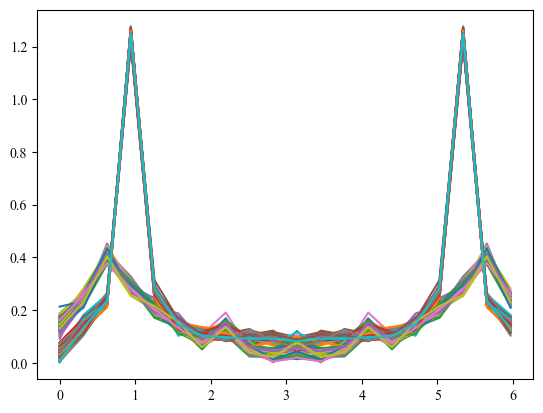

In [134]:
nboot = 100
points_dist_raw = np.zeros(nboot)
points_dist_readout = np.zeros(nboot)
points_dist_twirled_raw = np.zeros(nboot)
points_dist_twirled_readout = np.zeros(nboot)
points_dist_twirled_rescale_raw = np.zeros(nboot)
points_dist_twirled_rescale_readout = np.zeros(nboot)
obs_raw_gen = gv.raniter(obs_raw)
obs_readout_gen = gv.raniter(obs_readout)
obs_twirled_raw_gen = gv.raniter(obs_twirled_raw)
obs_twirled_readout_gen = gv.raniter(obs_twirled_readout)
obs_twirled_rescale_raw_gen = gv.raniter(obs_twirled_rescale_raw)
obs_twirled_rescale_readout_gen = gv.raniter(obs_twirled_rescale_readout)
points_dist_raw_dd = np.zeros(nboot)
points_dist_readout_dd = np.zeros(nboot)
points_dist_twirled_raw_dd = np.zeros(nboot)
points_dist_twirled_readout_dd = np.zeros(nboot)
points_dist_twirled_rescale_raw_dd = np.zeros(nboot)
points_dist_twirled_rescale_readout_dd = np.zeros(nboot)
obs_raw_dd_gen = gv.raniter(obs_raw_dd)
obs_readout_dd_gen = gv.raniter(obs_readout_dd)
obs_twirled_raw_dd_gen = gv.raniter(obs_twirled_raw_dd)
obs_twirled_readout_dd_gen = gv.raniter(obs_twirled_readout_dd)
obs_twirled_rescale_raw_dd_gen = gv.raniter(obs_twirled_rescale_raw_dd)
obs_twirled_rescale_readout_dd_gen = gv.raniter(obs_twirled_rescale_readout_dd)
for i in range(nboot):
    pts = next(obs_raw_gen)
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_raw[i] += loc[0][0]
    pts = next(obs_readout_gen)
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_readout[i] += loc[0][0]
    plt.plot(np.linspace(0, 19, 20) * np.pi * 2 / 20, fft)
    
    
    pts = next(obs_twirled_raw_gen)[:]
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_raw_dd[i] += loc[0][0]
    pts = next(obs_twirled_readout_gen)[:]
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_readout[i] += loc[0][0]
#     print(fft_f)
    
    
    pts = next(obs_twirled_rescale_raw_gen)[:-3]
    fft_f = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_rescale_raw[i] += loc[0][0]
    pts = next(obs_twirled_rescale_readout_gen)[:-3]
    fft_f = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_rescale_readout[i] += loc[0][0]
    
    pts = next(obs_raw_dd_gen)
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_raw_dd[i] += loc[0][0]
    pts = next(obs_readout_dd_gen)
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_readout_dd[i] += loc[0][0]
    plt.plot(np.linspace(0, 19, 20) * np.pi * 2 / 20, fft)
    
    
    pts = next(obs_twirled_raw_dd_gen)[:]
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_raw_dd[i] += loc[0][0]
    pts = next(obs_twirled_readout_dd_gen)[:]
    fft = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_readout_dd[i] += loc[0][0]
#     print(fft_f)
    
    
    pts = next(obs_twirled_rescale_raw_dd_gen)[:-3]
    fft_f = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_rescale_raw_dd[i] += loc[0][0]
    pts = next(obs_twirled_rescale_readout_dd_gen)[:-3]
    fft_f = np.abs(np.fft.fft(pts, norm='ortho'))
    fft_f = np.concatenate((fft[10:], fft[:10]))
    loc = np.where(fft[:10] == max(fft[:10]))
    points_dist_twirled_rescale_readout_dd[i] += loc[0][0]
#     break
    
fft_f = np.abs(np.fft.fft(exact3, norm='ortho'))
# fft_f = np.concatenate((fft_f[10:], fft_f[:10]))
# plt.plot(fft_f, 'o')
    

In [15]:
final = gv.gvar(np.array([0.85856696, 0.7717936 , 0.67746276, 0.60539934, 0.53915992,
       0.47317685, 0.42017705, 0.36717922, 0.31656691, 0.27894088,
       0.2374635 , 0.19974721, 0.17847177, 0.13001816, 0.10380372,
       0.09954978, 0.08547303, 0.08836259, 0.08026553, 0.06881287]),
                   np.array([[8.86050283e-05, 6.83502426e-05, 5.99962788e-05, 5.36143233e-05,
        4.77481434e-05, 5.23808316e-05, 4.65137365e-05, 4.06468592e-05,
        3.50440598e-05, 3.08788467e-05, 1.61767918e-05, 1.36074344e-05,
        1.21580823e-05, 8.85726356e-06, 7.07144949e-06, 1.10201935e-05,
        9.46189242e-06, 9.78176765e-06, 8.88542044e-06, 7.61760718e-06],
       [6.83502426e-05, 7.64103330e-05, 5.39325949e-05, 4.81956488e-05,
        4.29223499e-05, 4.70868231e-05, 4.18127017e-05, 3.65387759e-05,
        3.15022384e-05, 2.77579937e-05, 1.45418412e-05, 1.22321627e-05,
        1.09292933e-05, 7.96208060e-06, 6.35675458e-06, 9.90640821e-06,
        8.50560102e-06, 8.79314722e-06, 7.98739172e-06, 6.84771340e-06],
       [5.99962788e-05, 5.39325949e-05, 6.45530525e-05, 4.23050376e-05,
        3.76762565e-05, 4.13317358e-05, 3.67022327e-05, 3.20729014e-05,
        2.76519440e-05, 2.43653317e-05, 1.27644954e-05, 1.07371125e-05,
        9.59348353e-06, 6.98893215e-06, 5.57981371e-06, 8.69561844e-06,
        7.46602194e-06, 7.71842341e-06, 7.01114968e-06, 6.01076612e-06],
       [5.36143233e-05, 4.81956488e-05, 4.23050376e-05, 5.65368626e-05,
        3.36685381e-05, 3.69351749e-05, 3.27981237e-05, 2.86612260e-05,
        2.47105370e-05, 2.17735299e-05, 1.14067039e-05, 9.59497878e-06,
        8.57300049e-06, 6.24550181e-06, 4.98627485e-06, 7.77064357e-06,
        6.67184236e-06, 6.89739525e-06, 6.26535600e-06, 5.37138577e-06],
       [4.77481434e-05, 4.29223499e-05, 3.76762565e-05, 3.36685381e-05,
        4.99452712e-05, 3.28939342e-05, 2.92095361e-05, 2.55252746e-05,
        2.20068479e-05, 1.93911918e-05, 1.01586460e-05, 8.54514976e-06,
        7.63499063e-06, 5.56215386e-06, 4.44070449e-06, 6.92042313e-06,
        5.94184661e-06, 6.14272076e-06, 5.57983572e-06, 4.78367872e-06],
       [5.23808316e-05, 4.70868231e-05, 4.13317358e-05, 3.69351749e-05,
        3.28939342e-05, 5.51096112e-05, 3.20435452e-05, 2.80018241e-05,
        2.41420276e-05, 2.12725915e-05, 1.11442726e-05, 9.37422942e-06,
        8.37576355e-06, 6.10181306e-06, 4.87155683e-06, 7.59186625e-06,
        6.51834489e-06, 6.73870854e-06, 6.12121047e-06, 5.24780759e-06],
       [4.65137365e-05, 4.18127017e-05, 3.67022327e-05, 3.27981237e-05,
        2.92095361e-05, 3.20435452e-05, 4.86627779e-05, 2.48653836e-05,
        2.14379168e-05, 1.88898818e-05, 9.89602003e-06, 8.32423664e-06,
        7.43760737e-06, 5.41835852e-06, 4.32590137e-06, 6.74151319e-06,
        5.78823527e-06, 5.98391633e-06, 5.43558326e-06, 4.66000887e-06],
       [4.06468592e-05, 3.65387759e-05, 3.20729014e-05, 2.86612260e-05,
        2.55252746e-05, 2.80018241e-05, 2.48653836e-05, 4.30534352e-05,
        1.87339064e-05, 1.65072605e-05, 8.64781380e-06, 7.27428282e-06,
        6.49948600e-06, 4.73492934e-06, 3.78026615e-06, 5.89119167e-06,
        5.05815274e-06, 5.22915213e-06, 4.74998148e-06, 4.07223196e-06],
       [3.50440598e-05, 3.15022384e-05, 2.76519440e-05, 2.47105370e-05,
        2.20068479e-05, 2.41420276e-05, 2.14379168e-05, 1.87339064e-05,
        3.83237238e-05, 1.42318850e-05, 7.45579141e-06, 6.27158917e-06,
        5.60359103e-06, 4.08226244e-06, 3.25919088e-06, 5.07914454e-06,
        4.36093245e-06, 4.50836112e-06, 4.09523979e-06, 3.51091186e-06],
       [3.08788467e-05, 2.77579937e-05, 2.43653317e-05, 2.17735299e-05,
        1.93911918e-05, 2.12725915e-05, 1.88898818e-05, 1.65072605e-05,
        1.42318850e-05, 3.52914629e-05, 6.56962240e-06, 5.52617025e-06,
        4.93756801e-06, 3.59705916e-06, 2.87181498e-06, 4.47545537e-06,
        3.84260743e-06, 3.97251326e-06, 3.60849406e-06, 3.09361729e-06],
       [1.61767918e-05, 1.45418412e-05, 1.27644954e-05, 1.14067039e-05,
        1.01586460e-05, 1.11442726e-05, 9.89602003e-06, 8.64781380e-06,
        7.45579141e-06, 6.56962240e-06, 2.76341807e-05, 2.89504678e-06,
        2.58669019e-06, 1.88442521e-06, 1.50448472e-06, 2.34459889e-06,
        2.01306289e-06, 2.08111788e-06, 1.89041572e-06, 1.62068238e-06],
       [1.36074344e-05, 1.22321627e-05, 1.07371125e-05, 9.59497878e-06,
        8.54514976e-06, 9.37422942e-06, 8.32423664e-06, 7.27428282e-06,
        6.27158917e-06, 5.52617025e-06, 2.89504678e-06, 2.67922225e-05,
        2.17584657e-06, 1.58512223e-06, 1.26552763e-06, 1.97220660e-06,
        1.69332841e-06, 1.75057423e-06, 1.59016127e-06, 1.36326964e-06],
       [1.21580823e-05, 1.09292933e-05, 9.59348353e-06, 8.57300049e-06,
        7.63499063e-06, 8.37576355e-06, 7.43760737e-06, 6.49948600e-06,
        5.60359103e-06, 4.93756801e-06, 2.58669019e-06, 2.17584657e-06,
        2.63781516e-05, 1.41628804e-06, 1.13073403e-06, 1.76214336e-06,
        1.51296898e-06, 1.56411745e-06, 1.42079036e-06, 1.21806536e-06],
       [8.85726356e-06, 7.96208060e-06, 6.98893215e-06, 6.24550181e-06,
        5.56215386e-06, 6.10181306e-06, 5.41835852e-06, 4.73492934e-06,
        4.08226244e-06, 3.59705916e-06, 1.88442521e-06, 1.58512223e-06,
        1.41628804e-06, 2.56127853e-05, 8.23749099e-07, 1.28373602e-06,
        1.10221043e-06, 1.13947251e-06, 1.03505754e-06, 8.87370696e-07],
       [7.07144949e-06, 6.35675458e-06, 5.57981371e-06, 4.98627485e-06,
        4.44070449e-06, 4.87155683e-06, 4.32590137e-06, 3.78026615e-06,
        3.25919088e-06, 2.87181498e-06, 1.50448472e-06, 1.26552763e-06,
        1.13073403e-06, 8.23749099e-07, 2.52981212e-05, 1.02490734e-06,
        8.79981193e-07, 9.09730442e-07, 8.26367764e-07, 7.08457755e-07],
       [1.10201935e-05, 9.90640821e-06, 8.69561844e-06, 7.77064357e-06,
        6.92042313e-06, 7.59186625e-06, 6.74151319e-06, 5.89119167e-06,
        5.07914454e-06, 4.47545537e-06, 2.34459889e-06, 1.97220660e-06,
        1.76214336e-06, 1.28373602e-06, 1.02490734e-06, 2.60851568e-05,
        1.37136849e-06, 1.41772991e-06, 1.28781697e-06, 1.10406523e-06],
       [9.46189242e-06, 8.50560102e-06, 7.46602194e-06, 6.67184236e-06,
        5.94184661e-06, 6.51834489e-06, 5.78823527e-06, 5.05815274e-06,
        4.36093245e-06, 3.84260743e-06, 2.01306289e-06, 1.69332841e-06,
        1.51296898e-06, 1.10221043e-06, 8.79981193e-07, 1.37136849e-06,
        2.57262625e-05, 1.21725703e-06, 1.10571431e-06, 9.47945830e-07],
       [9.78176765e-06, 8.79314722e-06, 7.71842341e-06, 6.89739525e-06,
        6.14272076e-06, 6.73870854e-06, 5.98391633e-06, 5.22915213e-06,
        4.50836112e-06, 3.97251326e-06, 2.08111788e-06, 1.75057423e-06,
        1.56411745e-06, 1.13947251e-06, 9.09730442e-07, 1.41772991e-06,
        1.21725703e-06, 2.58003633e-05, 1.14309485e-06, 9.79992738e-07],
       [8.88542044e-06, 7.98739172e-06, 7.01114968e-06, 6.26535600e-06,
        5.57983572e-06, 6.12121047e-06, 5.43558326e-06, 4.74998148e-06,
        4.09523979e-06, 3.60849406e-06, 1.89041572e-06, 1.59016127e-06,
        1.42079036e-06, 1.03505754e-06, 8.26367764e-07, 1.28781697e-06,
        1.10571431e-06, 1.14309485e-06, 2.56198976e-05, 8.90191611e-07],
       [7.61760718e-06, 6.84771340e-06, 6.01076612e-06, 5.37138577e-06,
        4.78367872e-06, 5.24780759e-06, 4.66000887e-06, 4.07223196e-06,
        3.51091186e-06, 3.09361729e-06, 1.62068238e-06, 1.36326964e-06,
        1.21806536e-06, 8.87370696e-07, 7.08457755e-07, 1.10406523e-06,
        9.47945830e-07, 9.79992738e-07, 8.90191611e-07, 2.53841564e-05]]))

Least Square Fit (no prior):
  chi2/dof [dof] = 2.5 [16]    Q = 0.001    

Parameters:
              0     1.203 (39)      [   1 +- inf ]  
              1    0.1356 (58)      [   1 +- inf ]  
              2    0.3664 (68)      [   1 +- inf ]  
              3   -0.0273 (89)      [   1 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 19/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit (no prior):
  chi2/dof [dof] = 3.5 [16]    Q = 2.3e-06    

Parameters:
              0    0.845 (18)     [   1 +- inf ]  
              1   0.1067 (20)     [   1 +- inf ]  
              2   0.0909 (57)     [   1 +- inf ]  
              3    0.087 (14)     [   1 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



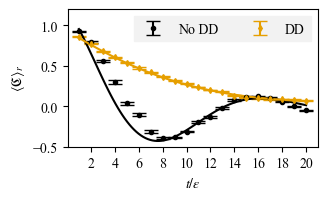

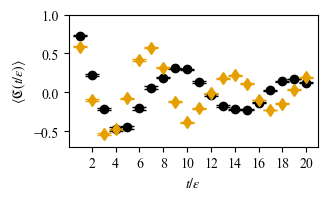

In [19]:
steps = np.linspace(1, 20, 20)

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
def fcn(x, p):
    return p[0] * gv.exp(-p[1] * x) * gv.cos(p[2] * x) + p[3]
flag = np.array([1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.8,
                 1.3, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 0.8])
fit1 = lsqfit.nonlinear_fit(data=(steps, res_twirled_readout), fcn=fcn, p0=[1, 1, 1, 1])
fit2 = lsqfit.nonlinear_fit(data=(steps, final), fcn=fcn, p0=[1, 1, 1, 1])
print(fit1, fit2)
i = 0
fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(3.375, 3.375 / 1.6)
ax.errorbar(steps, gv.mean(res_twirled_readout), yerr=gv.sdev(res_twirled_readout) / np.sqrt(30),
             color=colors[i], fmt=fmts[i], capsize=5, markersize=3, label='No DD')
i += 1
ax.errorbar(steps, gv.mean(final), yerr=gv.sdev(final),
             color=colors[i], fmt=fmts[i], capsize=5, markersize=3, label='DD')

ax.plot(np.linspace(1, 20, 100), fcn(np.linspace(1, 20, 100), gv.mean(fit1.p)), color=colors[0])

ax.plot(np.linspace(1, 20, 100), fcn(np.linspace(1, 20, 100), gv.mean(fit2.p)), color=colors[1])

ax.xaxis.set_ticks([2 * i for i in range(1, 11)])
ax.set_ylim(-0.5, 1.2)
ax.set_xlabel(r'$t/\epsilon$')
ax.set_ylabel(r'$\langle \mathfrak{C} \rangle_{r}$')
fig.tight_layout()
ax.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=2, fancybox=False)
fig.savefig('plots/dynamicdecouplingeffectsrescalingsuba.pdf')

fig, ax = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(3.375, 3.375 / 1.6)
i = 0
ax.errorbar(steps, gv.mean(obs_twirled_readout), yerr=gv.sdev(res_twirled_readout) / np.sqrt(30),
             color=colors[i], fmt=fmts[i], capsize=5, label='without dynamic decoupling')
i += 1
ax.errorbar(steps, gv.mean(obs_twirled_readout_dd), yerr=gv.sdev(final),
             color=colors[i], fmt=fmts[i], capsize=5, label='with dynamic decoupling')
ax.set_xlabel(r'$t/\epsilon$')
ax.set_ylim(-0.7, 1)
ax.xaxis.set_ticks([2 * i for i in range(1, 11)])
ax.set_ylabel(r'$\langle \mathfrak{C}(t / \epsilon) \rangle$')
# plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
#            facecolor=(0.95, 0.95, 0.95), ncol=1, fancybox=False)
fig.tight_layout()
fig.savefig('plots/dynamicdecouplingeffectsrescalingsubb.pdf')

Least Square Fit (no prior):
  chi2/dof [dof] = 2.5 [16]    Q = 0.001    

Parameters:
              0     1.203 (39)      [   1 +- inf ]  
              1    0.1356 (58)      [   1 +- inf ]  
              2    0.3664 (68)      [   1 +- inf ]  
              3   -0.0273 (89)      [   1 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 19/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit (no prior):
  chi2/dof [dof] = 3.5 [16]    Q = 2.3e-06    

Parameters:
              0    0.845 (18)     [   1 +- inf ]  
              1   0.1067 (20)     [   1 +- inf ]  
              2   0.0909 (57)     [   1 +- inf ]  
              3    0.087 (14)     [   1 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



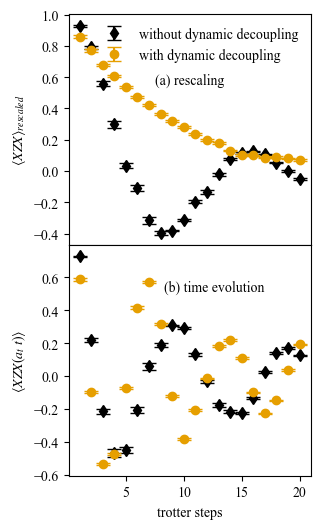

In [17]:
steps = np.linspace(1, 20, 20)
fmt = ['d', 'o', 's', '*']
def fcn(x, p):
    return p[0] * gv.exp(-p[1] * x) * gv.cos(p[2] * x) + p[3]
flag = np.array([1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.8,
                 1.3, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 0.8])
fit1 = lsqfit.nonlinear_fit(data=(steps, res_twirled_readout), fcn=fcn, p0=[1, 1, 1, 1])
fit2 = lsqfit.nonlinear_fit(data=(steps, final), fcn=fcn, p0=[1, 1, 1, 1])
print(fit1, fit2)
i = 0
fig, ax = plt.subplots(ncols=1, nrows=2)
fig.set_size_inches(3.375, 3.375 * 1.6)
ax[0].errorbar(steps, gv.mean(res_twirled_readout), yerr=gv.sdev(res_twirled_readout) / np.sqrt(30),
             color=colors[i], fmt=fmt[i], capsize=5, label='without dynamic decoupling')
i += 1
ax[0].errorbar(steps, gv.mean(final), yerr=gv.sdev(final),
             color=colors[i], fmt=fmt[i], capsize=5, label='with dynamic decoupling')
i = 0
ax[1].errorbar(steps, gv.mean(obs_twirled_readout), yerr=gv.sdev(res_twirled_readout) / np.sqrt(30),
             color=colors[i], fmt=fmt[i], capsize=5, label='without dynamic decoupling')
i += 1
ax[1].errorbar(steps, gv.mean(obs_twirled_readout_dd), yerr=gv.sdev(final),
             color=colors[i], fmt=fmt[i], capsize=5, label='with dynamic decoupling')
ax[1].set_xlabel('trotter steps')
ax[0].set_ylabel(r'$\langle XZX\rangle_{rescaled}$')
ax[1].set_ylabel(r'$\langle XZX(a_t~t) \rangle$')
ax[0].annotate('(a) rescaling', (0.5, 0.7), xycoords='axes fraction', horizontalalignment='center')
ax[1].annotate('(b) time evolution', (0.6, 0.8),xycoords='axes fraction', horizontalalignment='center')
ax[0].legend(framealpha=0)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
plt.savefig('dynamicdecouplingeffectsrescaling.pdf')

In [18]:
gv.mean(obs_twirled_readout), gv.sdev(obs_twirled_readout)

(array([ 0.72646123,  0.21821433, -0.21599768, -0.46893008, -0.44978976,
        -0.20574842,  0.05930803,  0.19030418,  0.30784389,  0.29361427,
         0.13152949, -0.03254466, -0.17671327, -0.21662935, -0.22573839,
        -0.13201323,  0.02420206,  0.13919184,  0.17182621,  0.12540779]),
 array([0.06764798, 0.09098477, 0.07821429, 0.04180775, 0.03340954,
        0.0518484 , 0.05116065, 0.04907045, 0.03618597, 0.02755369,
        0.04138756, 0.03731357, 0.03286512, 0.03074664, 0.02801247,
        0.04319589, 0.04989995, 0.02767561, 0.02995154, 0.02889463]))

In [38]:
res_twirled_readout = gv.gvar(gv.mean(res_twirled_readout), gv.sdev(res_twirled_readout))

In [39]:
gv.mean(obs_twirled_readout / res_twirled_readout), gv.sdev(obs_twirled_readout / res_twirled_readout)

(array([  0.78288807,   0.27608491,  -0.38714226,  -1.57584575,
        -13.04200066,   1.94494731,  -0.18846142,  -0.48254276,
         -0.8058741 ,  -0.93967716,  -0.66916337,   0.24366148,
          8.15313364,  -2.83672059,  -1.92643437,  -1.05413678,
          0.22809407,   2.56511891, -71.80942961,  -2.4036483 ]),
 array([7.30537163e-02, 1.15181447e-01, 1.40649566e-01, 1.89237143e-01,
        6.71498708e+00, 6.03723404e-01, 1.63055823e-01, 1.25282210e-01,
        9.51738358e-02, 9.04299696e-02, 2.12813547e-01, 2.80022698e-01,
        4.28980859e+00, 4.84806610e-01, 2.64273402e-01, 3.48151686e-01,
        4.70374003e-01, 5.76567251e-01, 1.69951119e+02, 5.90391170e-01]))

In [41]:
gv.evalcov(obs_twirled_readout / res_twirled_readout)

array([[5.33684546e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.32667657e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.97823005e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

ValueError: 'x' and 'y' must have the same size

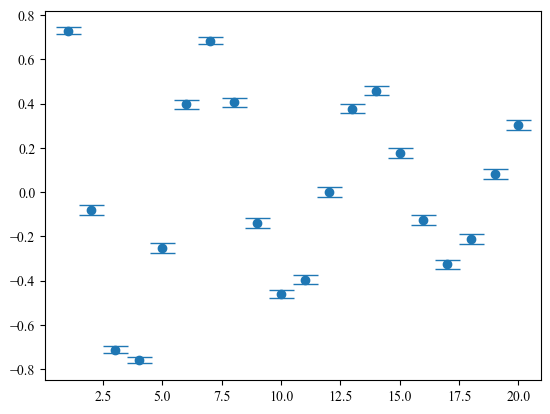

In [28]:
plt.errorbar(np.linspace(1, 20, 20), gv.mean(obs_readout_dd), yerr=gv.sdev(obs_readout_dd),
             fmt='o', capsize=9)
# plt.errorbar(n)
for i in range(30):
    plt.errorbar(np.linspace(1, 20, 20), obs_twirled_readout_dd[i])
plt.plot(np.linspace(1, 20, 20), exact3)

In [57]:
np.mean(points_dist_twirled_readout_dd) * 2 * np.pi / 20#, np.std(points_dist_twirled_rescale_raw)/ np.sqrt(100)

0.9424777960769379

In [58]:
def gaussian(xvals, mean, sigma):
    norm = 1 / sigma / np.sqrt(2 * np.pi)
    ret = np.exp(- (xvals - mean) ** 2 / (2 * sigma ** 2))
    return ret * norm

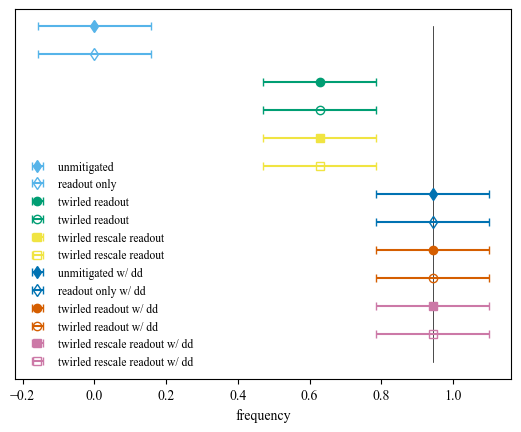

In [59]:
plt.plot([0.9424] * 2, [0.8, 2], 'k', linewidth=0.5)
plt.errorbar(0, 2, xerr=2 * np.pi / 20 / 2, fmt='d', color=colors[2], capsize=3, label='unmitigated')
plt.errorbar(0, 1.9, xerr=2 * np.pi / 20 / 2, fmt='d', fillstyle='none', color=colors[2], capsize=3, label='readout only')
plt.errorbar(0.628, 1.8, xerr=2 * np.pi / 20 / 2, fmt='o', color=colors[3], capsize=3, label='twirled readout')
plt.errorbar(0.628, 1.7, xerr=2 * np.pi / 20 / 2, fmt='o', fillstyle='none', color=colors[3], capsize=3, label='twirled readout')
plt.errorbar(0.628, 1.6, xerr=2 * np.pi / 20 / 2, fmt='s', color=colors[4], capsize=3, label='twirled rescale readout')
plt.errorbar(0.628, 1.5, xerr=2 * np.pi / 20 / 2, fmt='s', fillstyle='none', color=colors[4], capsize=3, label='twirled rescale readout')

plt.errorbar(0.9424, 1.4, xerr=2 * np.pi / 20 / 2, fmt='d', color=colors[5], capsize=3, label='unmitigated w/ dd')
plt.errorbar(0.9424, 1.3, xerr=2 * np.pi / 20 / 2, fmt='d', fillstyle='none', color=colors[5], capsize=3, label='readout only w/ dd')
plt.errorbar(0.9424, 1.2, xerr=2 * np.pi / 20 / 2, fmt='o', color=colors[6], capsize=3, label='twirled readout w/ dd')
plt.errorbar(0.9424, 1.1, xerr=2 * np.pi / 20 / 2, fmt='o', fillstyle='none', color=colors[6], capsize=3, label='twirled readout w/ dd')
plt.errorbar(0.9424, 1., xerr=2 * np.pi / 20 / 2, fmt='s', color=colors[7], capsize=3, label='twirled rescale readout w/ dd')
plt.errorbar(0.9424, 0.9, xerr=2 * np.pi / 20 / 2, fmt='s', fillstyle='none', color=colors[7], capsize=3, label='twirled rescale readout w/ dd')
# plt.errorbar(0, 1.9, xerr=2 * np.pi / 20, fmzt='d', fillstyle='none', color=colors[2], capsize=3, label='readout only')
plt.legend(ncol=1, framealpha=0, fontsize='small')
plt.xlabel('frequency')
plt.yticks([])
# plt.plot(xpoints, gaussian(xpoints, 0, 2 * np.pi / 20), '-', color=colors[3], label='unmitigated')
# plt.plot(xpoints, gaussian(xpoints, 0, 2 * np.pi / 20), '--', color=colors[2], label='readout')
plt.savefig('testfourier.pdf')

(0.0, 2.0)

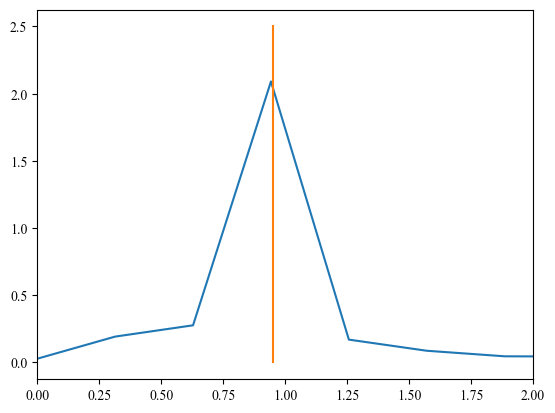

In [60]:
plt.plot(np.linspace(0, 19, 20) * 2 * np.pi / 20, np.abs(np.fft.fft(exact3, norm='ortho')))
plt.plot([0.95, 0.95], [0, 2.5])
plt.xlim(0, 2)

In [61]:
obs_raw = np.zeros(20)
obs_readout = np.zeros(20)
obs_twirled_raw = np.zeros((30, 20))
obs_twirled_readout = np.zeros((30, 20))
res_twirled_raw = np.zeros((30, 20))
res_twirled_readout = np.zeros((30, 20))
obs_kitchen_sink = np.zeros((30, 20))
for i in range(20):
    bare_counts = eval(data0_N['counts bare'][2 * i])
    readout_counts = eval(data0_N['counts mitigated'][2 * i])
    bc = {}
    rc = {}
    for key in bare_counts.keys():
        key2 = np.binary_repr(int(key, 16), width=7)
        bc[key2] = bare_counts[key]
    for key in readout_counts.keys():
        key2 = np.binary_repr(int(key, 16), width=7)
        rc[key2] = readout_counts[key]
    normalization = sum(bare_counts.values())
    for key in bc.keys():
        if key.count('1') % 2 == 0:
            obs_raw[i] += bc[key] / normalization
        else:
            obs_raw[i] -= bc[key] / normalization
    for key in rc.keys():
        if key.count('1') % 2 == 0:
            obs_readout[i] += rc[key]
        else:
            obs_readout[i] -= rc[key]
            
            
for i in range(20):
    for j in range(30):
        bare_counts = eval(data1_N['counts bare'][60 * i + j])
        readout_counts = eval(data1_N['counts mitigated'][60 * i + j])
        bc = {}
        rc = {}
        print(len(bare_counts.keys()))
        for key in bare_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            bc[key2] = bare_counts[key]
        for key in readout_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            rc[key2] = readout_counts[key]
        normalization = sum(bare_counts.values())
        for key in bc.keys():
            if key.count('1') % 2 == 0:
                obs_twirled_raw[j, i] += bc[key] / normalization
            else:
                obs_twirled_raw[j, i] -= bc[key] / normalization
        for key in rc.keys():
            if key.count('1') % 2 == 0:
                obs_twirled_readout[j, i] += rc[key]
            else:
                obs_twirled_readout[j, i] -= rc[key]
    for j in range(30):
        bare_counts = eval(data1_N['counts bare'][60 * i + j + 30])
        readout_counts = eval(data1_N['counts mitigated'][60 * i + j + 30])
        bc = {}
        rc = {}
        for key in bare_counts.keys():
            print(key2)
            key2 = np.binary_repr(int(key, 16), width=3)
            bc[key2] = bare_counts[key]
        for key in readout_counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            rc[key2] = readout_counts[key]
        normalization = sum(bare_counts.values())
#         print(normalization)
        for key in bc.keys():
            if key.count('1') % 2 == 0:
                res_twirled_raw[j, i] += bc[key] / normalization
            else:
                res_twirled_raw[j, i] -= bc[key] / normalization
        for key in rc.keys():
            if key.count('1') % 2 == 0:
                res_twirled_readout[j, i] += rc[key]
            else:
                res_twirled_readout[j, i] -= rc[key]
          
# print(obs_twirled_raw)
obs_twirled_readout = gv.gvar(np.sum(obs_twirled_readout, axis=0) / 30, np.std(obs_twirled_readout, axis=0) / np.sqrt(30))
obs_twirled_raw = gv.gvar(np.sum(obs_twirled_raw, axis=0) / 30, np.std(obs_twirled_raw, axis=0)/ np.sqrt(30))
res_twirled_readout = gv.gvar(np.mean(res_twirled_readout, axis=0), np.std(res_twirled_readout, axis=0) / np.sqrt(30))
res_twirled_raw = gv.gvar(np.mean(res_twirled_raw, axis=0), np.std(res_twirled_raw, axis=0) / np.sqrt(30))
obs_twirled_rescale_readout = obs_twirled_readout / res_twirled_raw
obs_twirled_rescale_raw = obs_twirled_raw / res_twirled_raw
    
obs_raw = gv.gvar(obs_raw, np.sqrt(1 - obs_raw ** 2) / np.sqrt(2000))
obs_readout = gv.gvar(obs_readout, np.sqrt(1 - obs_readout ** 2) / np.sqrt(2000))

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001
010
011
100
101
110
111
000
001


In [62]:
counts3 = {(7,1): {}, (7, 2): {}, (3, 1): {}, (3, 2): {}}


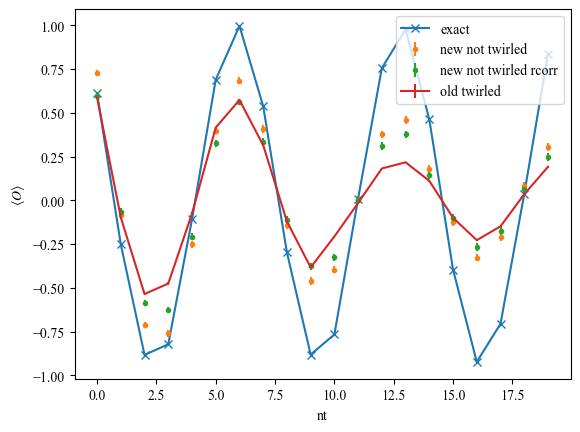

In [72]:
plt.plot(exact3, '-x', label='exact')
plt.errorbar(np.linspace(1, 20, 20) - 1, gv.mean(obs_readout_dd), yerr=gv.sdev(obs_raw_dd), fmt='.',
             label='new not twirled')
plt.errorbar(np.linspace(1, 20, 20) - 1, gv.mean(obs_raw_dd), yerr=gv.sdev(obs_raw_dd), fmt='.',
             label='new not twirled rcorr')
plt.errorbar(np.linspace(1, 20, 20) - 1, gv.mean(obs_twirled_readout_dd), yerr=gv.sdev(obs_twirled_readout_dd),
             label='old twirled')
plt.legend()
plt.xlabel('nt')
plt.ylabel(r'$\langle O \rangle$')
# plt.ylim(-1, 1)
plt.savefig('monthsoffsetdynamicdecouplingcomparison.pdf')

In [41]:
def calculate_chisquaredf(data, theory):
    res = (gv.mean(data - theory))**2# / gv.sdev(data)) ** 2
#     res /= gv.sdev(data) ** 2
    return np.sqrt(np.cumsum(res) / np.linspace(1, len(data), len(data)))

def calculate_chisquared(data, theory):
    chi2 = calculate_chisquaredf(data, theory)
    return chi2#-np.linspace(1, len(data), len(data)) * np.log(chi2) / 2




In [42]:
chi2_raw = calculate_chisquared(obs_raw, exact3)
chi2_ro = calculate_chisquared(obs_readout, exact3)
chi2_tw = calculate_chisquared(obs_twirled_raw, exact3)
chi2_tw_ro = calculate_chisquared(obs_twirled_readout, exact3)
chi2_tw_rs = calculate_chisquared(obs_twirled_rescale_raw, exact3)
chi2_tw_rs_ro = calculate_chisquared(obs_twirled_rescale_readout, exact3)
chi2_tw_ro_dd = calculate_chisquared(obs_twirled_readout_dd, exact3)
chi2_tw_dd = calculate_chisquared(obs_twirled_raw_dd, exact3)
chi2_tw_rs_ro_dd = calculate_chisquared(obs_twirled_rescale_readout_dd, exact3)
chi2_tw_rs_dd = calculate_chisquared(obs_twirled_rescale_raw_dd, exact3)
chi2_ro_dd = calculate_chisquared(obs_readout_dd, exact3)
chi2_dd = calculate_chisquared(obs_raw_dd, exact3)

print(chi2_tw_ro, chi2_tw, chi2_ro, chi2_tw_dd, chi2_tw_ro_dd)

[0.11546123 0.34236882 0.47585884 0.44832557 0.42898041 0.53552088
 0.60922521 0.58291139 0.5855038  0.66821037 0.692204   0.66284866
 0.68727499 0.73498662 0.73193163 0.71175609 0.7277176  0.73467299
 0.7157568  0.7155989 ] [0.0115     0.31012581 0.48324681 0.47269758 0.43926273 0.53218449
 0.60886252 0.58503267 0.58140936 0.65625315 0.67877649 0.64998434
 0.67309194 0.71880396 0.71457715 0.695553   0.71276714 0.71948725
 0.70075753 0.70237351] [0.24024908 0.3301735  0.39926039 0.40738549 0.37180038 0.4816782
 0.55772655 0.54250154 0.55324859 0.64302785 0.6694426  0.64094254
 0.6523526  0.68608162 0.66914454 0.66178975 0.6867605  0.69115946
 0.6727645  0.68105606] [0.12946667 0.15211321 0.28477738 0.32777497 0.2939255  0.30361384
 0.34424219 0.33675122 0.32434074 0.35605228 0.3841903  0.3678907
 0.3913602  0.43323159 0.42936352 0.42307281 0.44760719 0.4561868
 0.44402305 0.45878582] [0.0241339  0.11040283 0.22011243 0.25757193 0.23086651 0.23849212
 0.27258555 0.26681228 0.25839636 0.

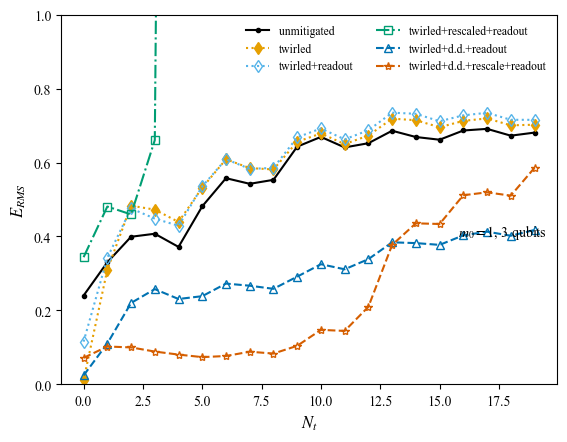

In [73]:
i = 0
plt.plot(chi2_ro, '.-', color=colors[i], label='unmitigated')
i+=1
# plt.plot(chi2_ro, '-o', fillstyle='none', color=colors[i], label='readout')
# i+=1
plt.plot(chi2_tw, ':d', color=colors[i], label='twirled')
i+=1
plt.plot(chi2_tw_ro, ':d', fillstyle='none', color=colors[i], label='twirled+readout')
# i+=1
# plt.plot(chi2_tw_rs, '-.s', color=colors[i], label='twirled+rescaled')
i+=1
plt.plot(chi2_tw_rs_ro, '-.s', fillstyle='none', color=colors[i], label='twirled+rescaled+readout')
i+=1
# plt.plot(chi2_dd, '--h', color=colors[i], label='d.d.')
# i+=1
# plt.plot(chi2_ro_dd, '--h', fillstyle='none', color=colors[i], label='d.d.+readout')
# i = 0
# plt.plot(chi2_tw_dd, '--^', color=colors[i], label='twirled+d.d.')
i+=1
plt.plot(chi2_tw_ro_dd, '--^', fillstyle='none', color=colors[i], label='twirled+d.d.+readout')
i+=1
# plt.plot(chi2_tw_rs_dd, '--*', color=colors[i], label='twirled+d.d.+rescale')
# i+=1
plt.plot(chi2_tw_rs_ro_dd, '--*', fillstyle='none', color=colors[i], label='twirled+d.d.+rescale+readout')
# plt.yscale('log')
plt.ylim(0, 1)
plt.legend(ncol=2, fontsize='small', framealpha=0)
plt.xlabel(r'$N_t$', fontsize='large')
plt.ylabel(r'$E_{RMS}$', fontsize='large')
plt.annotate(r'$m_0 = 1$, 3 qubits', (0.8, 0.4), xycoords='axes fraction')
plt.savefig('3qubitparam1.pdf')

In [726]:
relative_error_raw = (np.abs((obs_raw - exact3) / exact3)) #/ np.linspace(1, 20, 20)
relative_error_readout = (np.abs((obs_readout - exact3) / exact3)) #/ np.linspace(1, 20, 20)
relative_error_twirled_raw = (np.abs((obs_twirled_raw - exact3) / exact3)) #/ np.linspace(1, 20, 20)
relative_error_twirled_readout = (np.abs((obs_twirled_readout - exact3) / exact3)) #/ np.linspace(1, 20, 20)
relative_error_twirled_rescale_raw = (np.abs((obs_twirled_rescale_raw - exact3) / exact3)) #/ np.linspace(1, 20, 20)
relative_error_twirled_rescale_readout = (np.abs((-obs_twirled_rescale_readout - exact3) / exact3))# / np.linspace(1, 20, 20)

TypeError: bad operand type for abs(): 'gvar._gvarcore.GVar'

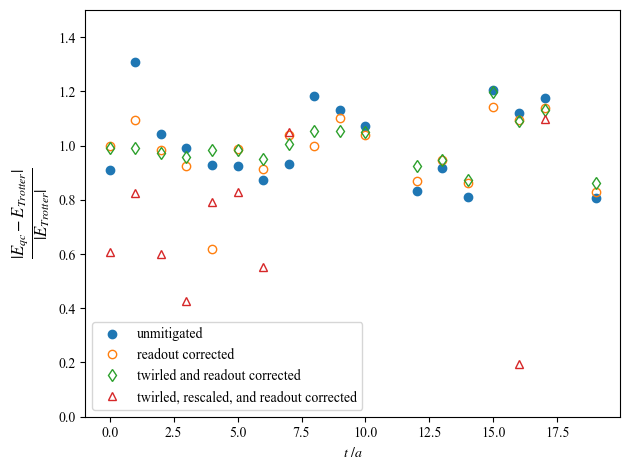

In [670]:
plt.plot(relative_error_raw, 'o', label='unmitigated')
plt.plot(relative_error_readout, 'o', fillstyle='none', label='readout corrected')
# plt.plot(relative_error_twirled_raw, 'd', label='twirled')
plt.plot(relative_error_twirled_readout, 'd', fillstyle='none', label='twirled and readout corrected')
# plt.plot(relative_error_twirled_rescale_raw, '^', label='twirled rescaled')
plt.plot(relative_error_twirled_rescale_readout, '^', fillstyle='none', label='twirled, rescaled, and readout corrected')
plt.legend()
plt.ylim(0, 1.5)
plt.ylabel(r'$\frac{|E_{qc}-E_{Trotter}|}{|E_{Trotter}|}$', fontsize='xx-large')
plt.xlabel(r'$t~/a$')
plt.tight_layout()
plt.savefig('test_readouterror')

In [671]:
plt.plot(np.abs(res_twirled_readout.sum(axis=0) / 30))

TypeError: bad operand type for abs(): 'gvar._gvarcore.GVar'

In [63]:
exact2

array([ 0.62042, -0.1735 , -0.65614, -0.39714,  0.36114,  0.92978,
        0.79648,  0.09512, -0.52714, -0.51798,  0.10646,  0.76276,
        0.85798,  0.327  , -0.33226, -0.52226, -0.0963 ,  0.53878,
        0.78854,  0.44262])